In [1]:
import sys
sys.path.append("../")

import QpixAsicArray as qparray
from QpixAsicArray import heatMap
from QpixAsic import QPByte, ProcQueue
from QpixAsic import AsicState
import QpixAsic as qpasic
import random
import numpy as np
import matplotlib.pyplot as plt

## Test Routing

(0,0) state: AsicState.Idle, @ 0.0008774874160620075
(0,1) state: AsicState.Idle, @ 0.0008277521275883147
(1,0) state: AsicState.Idle, @ 0.0006874970464780223
(1,1) state: AsicState.Idle, @ 0.0007509157138833308
end time: 0.005058823077895425 , timeout length: 5.073528847369281e-05


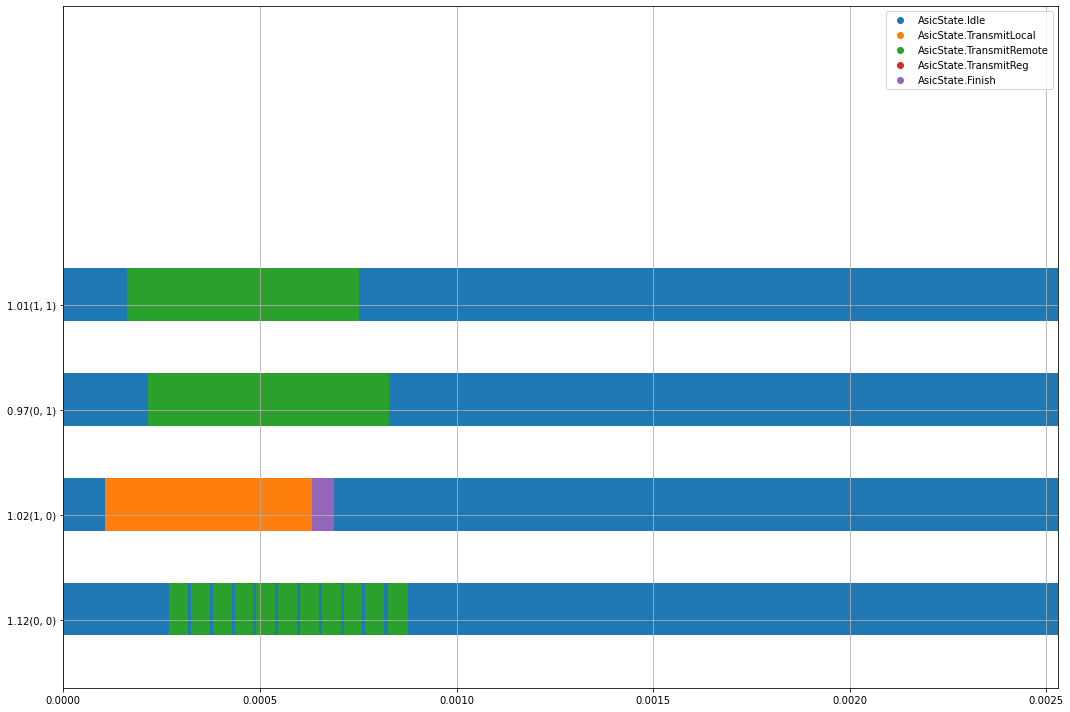

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

In [2]:
qpa = qparray.QpixAsicArray(2, 2, debug=0.0, deltaT=1e-9, seed=2)
route = "snake"
qpa.Route(route, transact=False)
r, c = qpa._nrows, qpa._ncols

hitTimes = np.linspace(1e-10, 1e-8, 10)
qpa[1][0].InjectHits(hitTimes)

dT = 0.0010
for i in range(r+c):
    qpa.Interrogate(dT)

for a in qpa:
    if len(a.state_times) > 2:
        print(f"({a.row},{a.col}) state: {a.state_times[-1][0]}, @ {a.state_times[-1][2]}")
    else:
        print(f"({a.row},{a.col}) state: {a.state_times[-1][0]}, @ {a.state_times[-1][2]}")

nTicks = qpa[0][0].transferTicks
T = qpa[0][0].tOsc 
pT = nTicks * T * (r + c)
end = dT+pT*20
print("end time:", end, ", timeout length:", nTicks*T)
qparray.viewAsicState(qpa, time_end=end*0.500, ordering="left")

### Snake

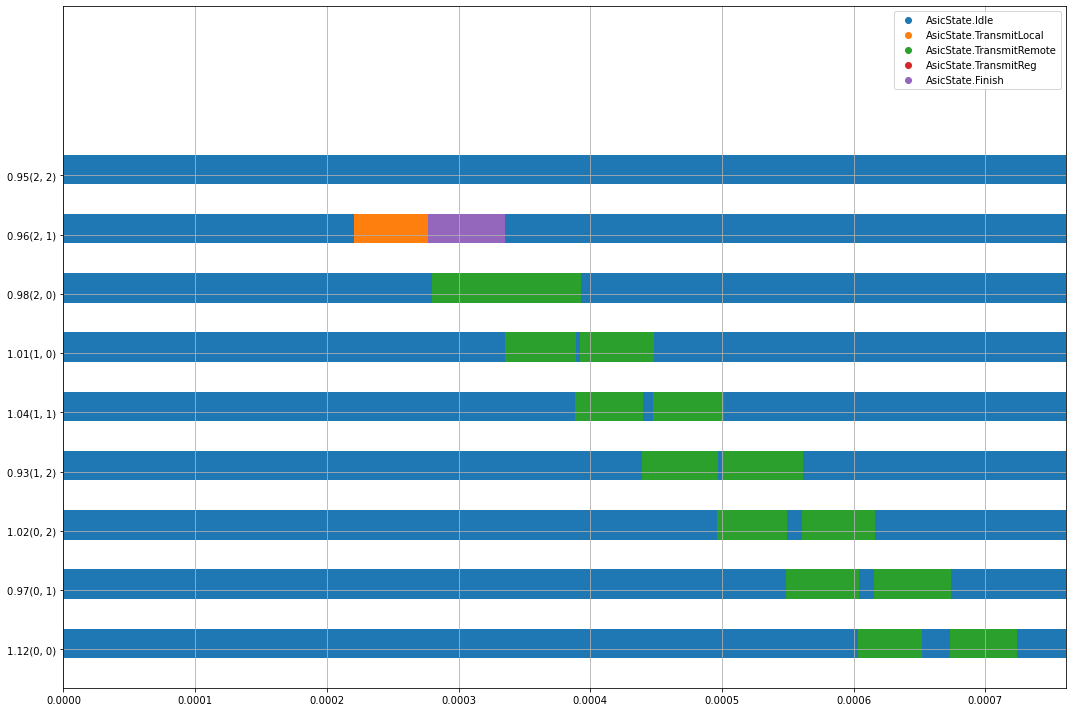

In [3]:
qpa = qparray.QpixAsicArray(3, 3, debug=0.0, deltaT=1e-6)
route = "Snake"
qpa.Route(route, transact=False)
r, c = qpa._nrows, qpa._ncols

dT = 1e-9
qpa[r-1][c-2].InjectHits([dT])

for i in range(r*c):
    qpa.Interrogate(0.0015)

nTicks = qpa[0][0].transferTicks
T = qpa[0][0].tOsc 
pT = nTicks * T * (r + c)
end = dT+pT*5
fig, ax = qparray.viewAsicState(qpa, time_end=end*0.5, ordering="snake")
fig.savefig('./pdfs/snake_timer.pdf')

## print states?
# for a in qpa:
#     states = [[state.value, round(time*1e6, 1)] for state, _, time in a.state_times]
#     print(f"({a.row},{a.col})", states)

### Left

end time: 0.0177352923115817 , timeout length: 5.073528847369281e-05


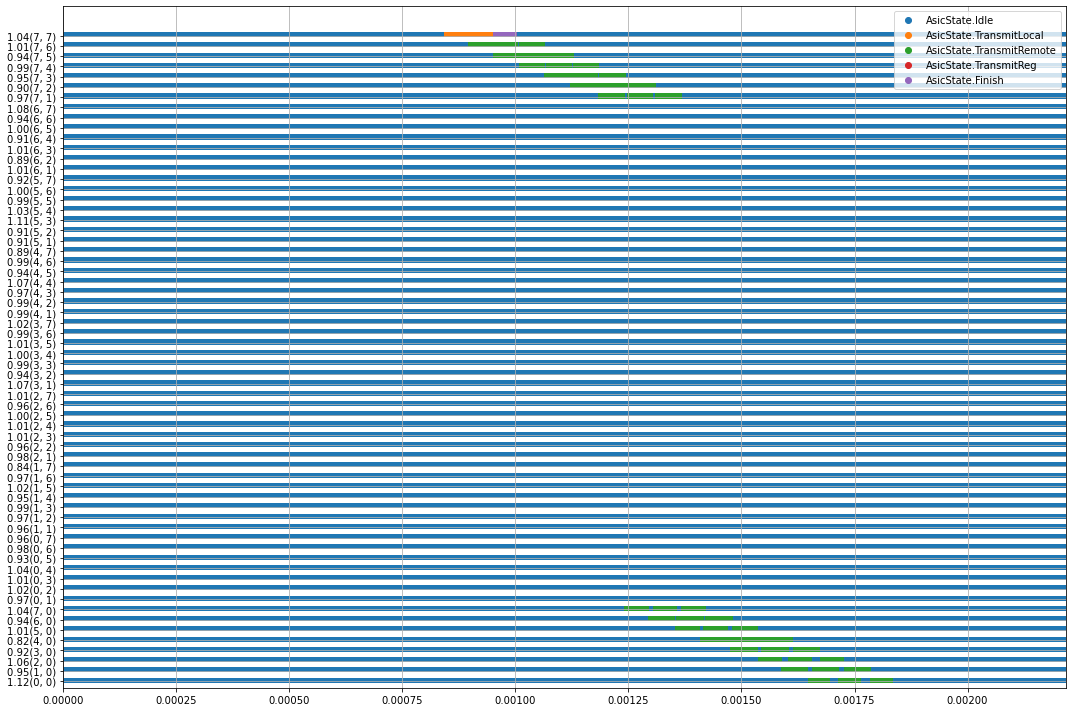

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

In [4]:
qpa = qparray.QpixAsicArray(8, 8, debug=0.0, deltaT=1e-7)
route = "Left"
qpa.Route(route, transact=False)
qpa.SetSendRemote(enabled=True, transact=False)
r, c = qpa._nrows, qpa._ncols

hitTimes = [1e-10, 1e-9]
qpa[r-1][c-1].InjectHits(hitTimes)

dT = 0.0015
for i in range(r+c):
    qpa.Interrogate(dT)

nTicks = qpa[0][0].transferTicks
T = qpa[0][0].tOsc 
pT = nTicks * T * (r + c)
end = dT+pT*20
print("end time:", end, ", timeout length:", nTicks*T)
qparray.viewAsicState(qpa, time_end=end*0.125, ordering="left")

### Trunk

end time: 0.007588234616843137 , timeout length: 5.073528847369281e-05


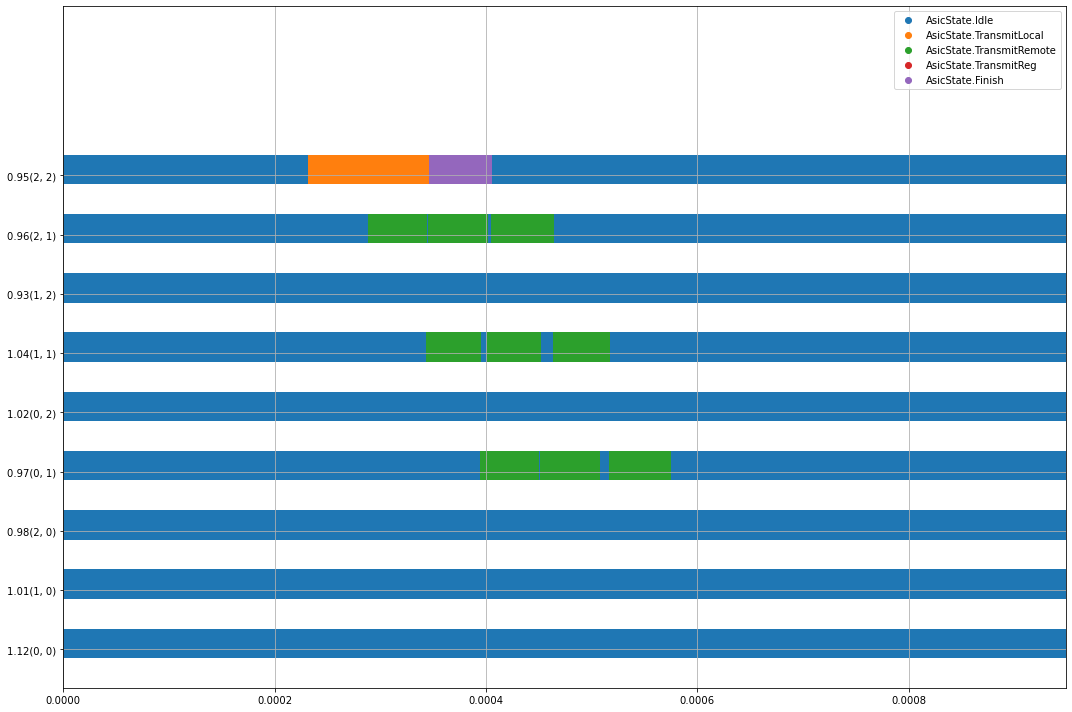

In [5]:
qpa = qparray.QpixAsicArray(3, 3, debug=0.0, deltaT=1e-7)
route = "Trunk"
qpa.Route(route, transact=False, pos=1)
qpa.SetSendRemote(enabled=True, transact=False)
r, c = qpa._nrows, qpa._ncols



hitTimes = [1e-10, 1e-9]
qpa[r-1][c-1].InjectHits(hitTimes)

dT = 0.0015
for i in range(r+c):
    qpa.Interrogate(dT)

nTicks = qpa[0][0].transferTicks
T = qpa[0][0].tOsc 
pT = nTicks * T * (r + c)
end = dT+pT*20
print("end time:", end, ", timeout length:", nTicks*T)
fig, ax = qparray.viewAsicState(qpa, time_end=end*0.125, ordering="left")
fig.savefig('./pdfs/trunk_timer.pdf')

In [6]:
if False:
    qpix_array = QpixAsicArray.QpixAsicArray(
                nrows=tRows, ncols=tCols, nPixs=nPix,
                fNominal=fNominal, pctSpread=pctSpread, deltaT=deltaT,
                timeEpsilon=timeEpsilon, timeout=timeout,
                hitsPerSec=hitsPerSec, debug=debug, tiledf=tiledf)

    rows, cols = qpix_array._nrows, qpix_array._ncols
    r = "Left"
    qpix_array.Route(r, transact=False)

    maxTime = 0
    for hit, asic in qpix_array:
        if len(hit) > 0:
            maxTime = np.max(hit) if maxTime < np.max(hit) else maxTime 
            nHits = np.random.randint(13)
            # asic.InjectHits(np.random.uniform(0,10,nHits))


    # attempt calibrate / interrogate procedure to reconstruct hit times
    calTime = 1
    nCals = 3
    for i in range(nCals):
        qpix_array.Calibrate(calTime)

    # make sure that there's nothing left in the buffers anywhere
    while True: 
        buffersEmpty = True
        for asic in qpix_array:
            if asic._localFifo._curSize > 0 or len(asic._times) > 0:
                buffersEmpty = False
            if asic._remoteFifo._curSize > 0:
                buffersEmpty = False
        if not buffersEmpty:
            qpix_array.Interrogate(0.01)
        else:
            break

    cal_words = [hit for hit in qpix_array._daqNode._localFifo._data if hit.wordType == AsicWord.REGRESP]
    end_words = [hit for hit in qpix_array._daqNode._localFifo._data if hit.wordType == AsicWord.EVTEND]

    fDaq = qpix_array._daqNode.fOsc
    for asic in qpix_array:
        r, c = asic.row, asic.col
        data = [data for data in cal_words if r == data.row and c == data.col]
        if len(data) > 1:
            fTrue = asic.fOsc
            fCalc =  [fDaq * (data[i+1].T() - data[i].T())/(data[i+1].daqT - data[i].daqT) for i in range(len(data)-1)]
            fDiff = [fTrue - calc for calc in fCalc]
            pDiff = np.mean(fDiff)/fTrue*100
            if abs(pDiff) > 1:
                print("bad pdiff: ", end="")
            print(f"({r},{c}): {pDiff:0.2e}")
        else:
            print(f"WARNING NOT ENOUGH cal times for ASIC ({r},{c})")


## Analyze CSV data from the output of the MP simulation

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np

# pd = pd.read_csv("output_data/parameter_frame.csv")
# pd = pd.read_csv("output_data/output_df30.csv")
tile_df = pd.read_csv("output_df.csv")
daq_df = pd.read_csv("output_daq_df.csv")

Index(['Unnamed: 0', 'Route', 'Timeout', 'Int_period', 'nHardInt', 'AsicX',
       'AsicY', 'WordType', 'DaqTime', 'Timestamp', 'SimTime', 'channels'],
      dtype='object') 12
140           1547187
141           3613468
142           1547191
143           3613492
144           1547204
             ...     
257814    30311203539
257815    30311203544
257816    30311203547
257817    30311203551
257818    30311203570
Name: Timestamp, Length: 182915, dtype: int64


<AxesSubplot:xlabel='DaqTime'>

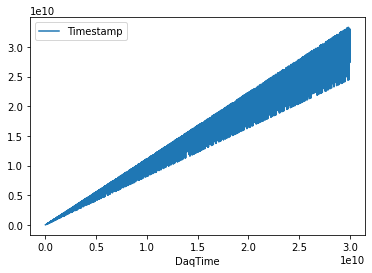

In [8]:
print(daq_df.columns, len(daq_df.columns))
daq_df = daq_df[daq_df["WordType"] == "AsicWord.DATA"]
print(daq_df["Timestamp"])
daq_df.plot(x='DaqTime', y='Timestamp')

## Test Math

min R1: 20.49512378094524


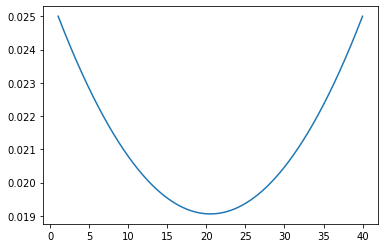

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Ro = 40
Co = 40

def aw(R1,R=Ro,C=Co):
    """
    weight of non-corner daq node
    """
    R2 = R - R1
    return 1 / (2 * C * R**2) * (2*R1**2 + R**2 - 2*R*R1 + C*R + 2*R2)

x = np.linspace(1, Ro, Ro*100)
vals = [aw(xi) for xi in x]

plt.plot(x, vals)
print("min R1:", x[np.argmin(vals)])

In [10]:
f = 30e6
t = 1/f
five_sig_f = 1.25*f

four_sig = 6210 / 1e6 * 22000
five_sig = 233 / 1e6 * 22000

avg_nyquist_time = 2**32/f/2
min_nyquist_time = 2**32/five_sig_f/2

print(f"min_nyquist_time: {min_nyquist_time}")
print(f"min_nyquist_time: {avg_nyquist_time*0.75}")

min_nyquist_time: 57.266230613333335
min_nyquist_time: 53.6870912
